# Generate Datasets

In [1]:
import sys
import time
from os import system
import random
import numpy as np
import pickle
from lib.environment import Environment
import lib.helper as helper
import matplotlib.pyplot as plt


In [2]:
signal_conf = {
    "number_of_symbols": 15,
    "variable_len_symbols": True,
    "add_blanks": True,
    "add_noise": False,
    "plot_signal": False,
    "verbose": False,
    "what_to_present": "ordered_symbols",
}
env = Environment(signal_conf)

Environment initiated
[256, 576, 448, 640, 512, 384, 512, 448, 576, 640, 512, 448, 384, 512, 640, 512]


In [3]:
L = 512 * 10
operations = env.all_ops.copy()
len(operations),operations[:3]

(110, [[1, 11, 1, 12, 1], [1, 11, 2, 12, 2], [1, 11, 3, 12, 3]])

# Datasets 

In [4]:
datasets = {}

## Dataset 1
- Train Dataset 1: Addition and subtraction of digits separated by single blank symbol 

- Test Dataset 1: Addition and subtraction of digits separated by randon number of blank symbols 

In [5]:
dataset_name = "dataset_1"
datasets[dataset_name]={"train":{}, "test":{}}

### Train Dataset 1:

Arithmetic operations involving addition and subtraction of single digits, with each digit or operation separated by a single blank symbol.

In [6]:
train_test= "train"

for expression_identifier, expression in enumerate(operations):    
    datasets[dataset_name][train_test][expression_identifier]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}
    
    # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
    datasets[dataset_name][train_test][expression_identifier]["label"]=expression[-1]-1 
    
    supervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression[:-1])) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)
    
    unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)


### Test Dataset 1:
Addition and subtraction of digits separated by randon number of blank symbols 

In [7]:
train_test = "test"

for run in range(5):
    for k, expression_init in enumerate(operations):    
        example_identifier=run*len(operations)+k 
        datasets[dataset_name][train_test][example_identifier]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":0}
        
        # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
        datasets[dataset_name][train_test][example_identifier]["label"]=expression_init[-1]-1 
        
        unsupervised_expression = expression_init.copy()
        m = len(unsupervised_expression)
        for j in range(m, -1, -1):
            random.seed(9001+run*13+j*7)        
            sp = random.randint(0, 2)
            unsupervised_expression[j:j] = [0] * sp
        last_val=0
        for index, j in enumerate(unsupervised_expression):
            if j>0:
                last_val= index
        supervised_expression = unsupervised_expression[:last_val]
        # print(unsupervised_expression)
        # print(supervised_expression)
        datasets[dataset_name][train_test][example_identifier]["expression"]=unsupervised_expression

        train_data_signal = env.gen_signal_for_symbols(unsupervised_expression)
        if len(train_data_signal)> L:
            print(run, k, len(train_data_signal))
        
        datasets[dataset_name][train_test][example_identifier]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_expression),L)

        
        datasets[dataset_name][train_test][example_identifier]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_expression),L)
        # break  
            

In [8]:
# i=0
# plt.plot(datasets[dataset_name]["train"][i]["supervised_signal"], label = "Supervised")
# plt.plot(22+datasets[dataset_name]["train"][i]["unsupervised_signal"], label = "Unsupervised")
# print(operations[i])
# plt.legend()
# plt.show()

In [9]:
# i=22
# plt.plot(datasets[dataset_name]["train"][i]["unsupervised_signal"], label = "Supervised")
# plt.plot(datasets[dataset_name]["test"][i]["unsupervised_signal"], label = "Unsupervised")
# print(datasets[dataset_name]["train"][i]["expression"])
# print(datasets[dataset_name]["test"][i]["expression"])
# print(operations[i])
# plt.legend()
# plt.show()

## Dataset 2
10 sets of addition and subtraction of digits separated by single blank symbol, spliting them as follows

- Train Dataset 2: Randomly chosen 100 out of 110 additions and subtractions of digits separated by single blank symbol

- Test Dataset 2: Remaining 10 out of 110 additions and subtractions of digits separated by randon number of blank symbols 


In [10]:
dataset_name = "dataset_2"
datasets[dataset_name]={"train":{}, "test":{}}
operations = env.all_ops.copy()

In [11]:
for dataset_2_subset_nr in range(10):
    
    random.seed(9001+dataset_2_subset_nr*13)        
    test_ops = random.sample(range(1, len(operations)), 10) 
    train_subset= "train"+str(dataset_2_subset_nr)
    test_subset= "test"+str(dataset_2_subset_nr)
    datasets[dataset_name][train_subset]= {}
    datasets[dataset_name][test_subset]={}
    
    train_counter =0
    test_counter = 0
    
    for expression_identifier in test_ops:
        
        expression  = operations[expression_identifier]    
        
        datasets[dataset_name][test_subset][test_counter]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}
        # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
        datasets[dataset_name][test_subset][test_counter]["label"]=expression[-1]-1 
     
        supervised_train_expression =[0]+[item for items in zip(expression[:-1], [0] * len(expression[:-1])) for item in items]
        datasets[dataset_name][test_subset][test_counter]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)
    
        unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
        datasets[dataset_name][test_subset][test_counter]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)
        
        test_counter+=1
    
    for expression_identifier, expression in enumerate(operations): 
        if expression_identifier not in test_ops:
            datasets[dataset_name][train_subset][train_counter]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}

            # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
            datasets[dataset_name][train_subset][train_counter]["label"]=expression[-1]-1 

            supervised_train_expression =[0]+[item for items in zip(expression[:-1], [0] * len(expression[:-1])) for item in items]
            datasets[dataset_name][train_subset][train_counter]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)

            unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
            datasets[dataset_name][train_subset][train_counter]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)
            
            train_counter+=1


## Dataset 3

- *Train Dataset 3*: Arithmetic operations involving addition and subtraction of single digits, with each digit or operation separated by a single blank symbol.

- Test Dataset 3: Arithmetic operations involving one or two additions or subtractions of single digits, with digits or operations separated by a random number of blank symbols.

In [12]:
dataset_name = "dataset_3"
datasets[dataset_name]={"train":{}, "test":{}}
operations = env.all_ops.copy()

### Train Dataset 3:
Arithmetic operations involving addition and subtraction of single digits, with each digit or operation separated by a single blank symbol.

In [13]:
train_test= "train"

for expression_identifier, expression in enumerate(operations):    
    datasets[dataset_name][train_test][expression_identifier]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}
    
    # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
    datasets[dataset_name][train_test][expression_identifier]["label"]=expression[-1]-1 
    
    supervised_train_expression =[0]+[item for items in zip(expression[:-1], [0] * len(expression[:-1])) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)
    
    unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)


### Test Dataset 3:
Two or more additions and subtractions of digits separated by randon number of blank symbols 

In [14]:
ops = []
for i in range(10):
    for j in range(10):
        for k in range(10):
            if i+j+k<10 and i+j<10:
                ops.append([i+1,10+1,j+1,10+1,k+1,11+1,(i+j+k)+1])
            if 0<=i+j-k<10 and i+j<10:
                ops.append([i+1,10+1,j+1,12+1,k+1,11+1,(i+j-k)+1])
            if 0<=i-j-k<10 and i-j>=0:
                ops.append([i+1,12+1,j+1,12+1,k+1,11+1,(i-j-k)+1])
            if 0<=i-j+k<10 and i-j>=0 and j-k<10:
                ops.append([i+1,12+1,j+1,10+1,k+1,11+1,(i-j+k)+1])

In [15]:
train_test= "test"

for expression_identifier, expression in enumerate(ops):    
    datasets[dataset_name][train_test][expression_identifier]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}
    
    # 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0
    datasets[dataset_name][train_test][expression_identifier]["label"]=expression[-1]-1 
    
    supervised_train_expression =[0]+[item for items in zip(expression[:-1], [0] * len(expression[:-1])) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)
    
    unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
    datasets[dataset_name][train_test][expression_identifier]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)

In [16]:
len(datasets[dataset_name]["test"].keys())

1210

[3, 11, 4, 12, 6]


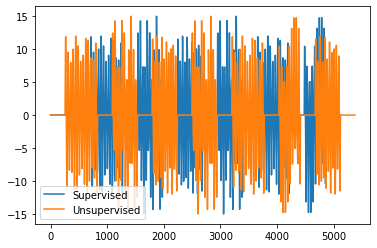

In [17]:
i=22
plt.plot(datasets[dataset_name][train_test][i]["supervised_signal"], label = "Supervised")
plt.plot(datasets[dataset_name][train_test][i]["unsupervised_signal"], label = "Unsupervised")
print(operations[i])
plt.legend()
plt.show()

# Validation Dataset

In [18]:
dataset_name = "validation"

datasets[dataset_name]={}

In [19]:
train_test= "validation1"

expression = list(range(15))
whole_signal = env.gen_signal_for_symbols(expression, add_blanks=True)
L = 512 * 30
whole_signal = helper.pad_audio_beginning(whole_signal, L)


datasets[dataset_name][train_test]={"supervised_signal":0, "unsupervised_signal":0,"label" : 0, "expression":expression}
    
# 0 represents the blank symbol, so the digits representations start from 1 which corresponds to 0

supervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression)) for item in items]
datasets[dataset_name][train_test]["supervised_signal"]=  helper.pad_audio_beginning(env.gen_signal_for_symbols(supervised_train_expression),L)

whole_signal = env.gen_signal_for_symbols(expression, add_blanks=False)
whole_signal = helper.pad_audio_beginning(whole_signal, L)

unsupervised_train_expression =[0]+[item for items in zip(expression, [0] * len(expression[:-1])) for item in items]
datasets[dataset_name][train_test]["unsupervised_signal"]= helper.pad_audio_beginning(env.gen_signal_for_symbols(unsupervised_train_expression),L)


In [20]:
pickle.dump(
    datasets, open("data/dataset_new.pkl", "wb")
) 